In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read_csv可用於遠端也可在地匯入資料
df = pd.read_csv("https://raw.githubusercontent.com/ryanchung403/dataset/main/Housing_Dataset_Sample.csv")

df.head(n=6)
df.describe().T
sns.displot(df['Price'])
sns.jointplot(x=df['Avg. Area Income'],y=df['Price'])







ModuleNotFoundError: No module named 'seaborn'

In [ ]:
X=df.iloc[:,:5]
y=df['Price']
from sklearn.model_selection import train_test_split

#訓練模型
#train_test_split可以分割資料成訓練模型與測試模型兩部分(test_size可以設定比例)，random_state=54控制切出同樣結果)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=54)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
predictions=reg.predict(X_test)
predictions



array([ 614607.96220736, 1849444.80372637, 1118945.08884252, ...,
        834789.03428572, 1787928.1090692 , 1455422.23696487])

In [ ]:
#匯出訓練模型的結果，比對準確度
from sklearn.metrics import r2_score
r2_score(y_test,predictions)


0.9216604865707125

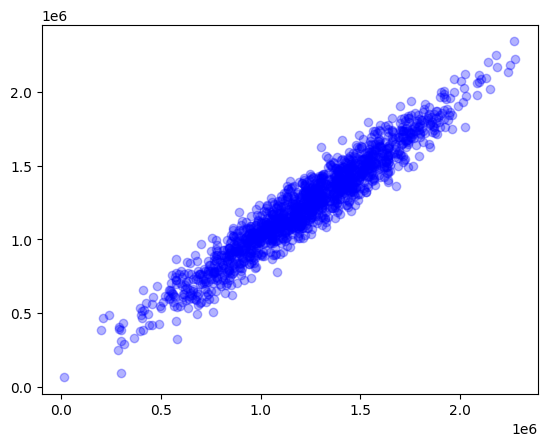

In [ ]:
plt.scatter(y_test,predictions,color='blue',alpha=0.3)

作業部分
===
這次主要分別使用兩種不同的方式，分別為**1.修改分割比例**與**2.使用別的模型**

分割比例部分
---
包含其他訓練模型，讓其輸出在分割比例0.2~0.3間以0.05為單位進行輸出r2_sorce值，並對其進行觀察。

模型部分
---
此次使用的模型包含
- Ridgecv
- SVR(rbf與linear核心)
- Lasso
- RandomForestRegressor
- GradientBoostingRegressor
- ElasticNet
- Make_pipeline[交互作用項]
- 集成模型

In [4]:
#使用相同模型，並調整輸出比例
for i in np.arange(0.2,3.05,0.05):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=54)
    reg=LinearRegression()
    reg.fit(X_train,y_train)
    predictions=reg.predict(X_test)
    predictions
    print(r2_score(y_test,predictions))
#比0.3高一些，但也沒超過0.92

NameError: name 'np' is not defined

In [ ]:
#嘗試使用新的模型訓練，課程使用線性回歸模型，這次使用RidgeCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=54)
from sklearn.linear_model import RidgeCV
reg1=RidgeCV()
reg1.fit(X_train,y_train)
predictions=reg1.predict(X_test)
predictions
r2_score(y_test,predictions)
#只有高一些，同樣沒超過0.92，推論只使用線性模型應該無法提升太多準確度

0.9216627933406366

In [ ]:
#嘗試將資料進行多項式特徵轉換，再使用線性回歸，看能是否用稍微提供非線性的方式提高準確度
from sklearn.preprocessing import PolynomialFeatures
#將次數設為二次
poly_feature=PolynomialFeatures(degree=2)
X_poly=poly_feature.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=54)
reg.fit(X_train,y_train)
predictions=reg.predict(X_test)
predictions
r2_score(y_test,predictions)
#沒有太大改變，還降低了...

0.9210593838799145

In [ ]:
#嘗試使用SVM處理，使用rbf核心
from sklearn.svm import SVR
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=54)
svr=SVR(gamma='scale')
svr.fit(X_train,y_train)
predictions=svr.predict(X_test)
predictions
r2_score(y_test,predictions)
#直接降到1%不到的準確度，看來rbf核心不是個處理此資料的好方式

0.00039489429938344145

In [ ]:
#將核心改成線性
svr=SVR(kernel='linear',gamma='scale')
svr.fit(X_train,y_train)
predictions=svr.predict(X_test)
predictions
r2_score(y_test,predictions)
#有回升，但仍不及其他線性模型，確定此資料較適合線性模型

0.5855226284805827

In [ ]:
#嘗試使用Lasso
from sklearn.linear_model import Lasso
reg2=Lasso()
reg2.fit(X_train,y_train)
predictions=reg2.predict(X_test)
predictions
r2_score(y_test,predictions)
#線性模型仍然到達0.92瓶頸

0.921660592496617

In [ ]:
#嘗試將LinearRegression、Ridgecv跟Lasso做成集成模型
from sklearn.ensemble import VotingRegressor
ensemble_reg=VotingRegressor(estimators=[('lasso',reg2),('linear',reg),('ridge',reg1)])
ensemble_reg.fit(X_train,y_train)
predictions=ensemble_reg.predict(X_test)
predictions
r2_score(y_test,predictions)
#也是，要是三個0.92能集成出一個準度0.95的東西才奇怪

0.9216613007343863

In [ ]:
#試試gpt說的交互作用項
from sklearn.pipeline import make_pipeline
model=make_pipeline(PolynomialFeatures(degree=10,include_bias=False,interaction_only=True),LinearRegression())
model.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions
r2_score(y_test,predictions)
#降低一些

0.9204438407472918

In [ ]:
#嘗試用隨機樹林回歸
from sklearn.ensemble import RandomForestRegressor
reg3=RandomForestRegressor()
reg3.fit(X_train,y_train)
predictions=reg3.predict(X_test)
predictions
r2_score(y_test,predictions)
#又降低啦~

0.890870668051215

In [ ]:
#嘗試梯度回歸
from sklearn.ensemble import GradientBoostingRegressor
reg4=GradientBoostingRegressor()
reg4.fit(X_train,y_train)
predictions=reg4.predict(X_test)
predictions
r2_score(y_test,predictions)
#還是低於0.92

0.9060799006899459

In [ ]:
#使用ElasticNet
from sklearn.linear_model import ElasticNet
net=ElasticNet(alpha=0.1,l1_ratio=0.5)
net.fit(X_train,y_train)
predictions=net.predict(X_test)
predictions
r2_score(y_test,predictions)

0.9210169258122926

In [ ]:
#嘗試把非線性與線性都加入集成
ensemble_reg1=VotingRegressor(estimators=[('lasso',reg2),('linear',reg),('ridge',reg1),('randomtree',reg3)])
ensemble_reg1.fit(X_train,y_train)
predictions=ensemble_reg1.predict(X_test)
predictions
r2_score(y_test,predictions)
#恩，集成不會讓準度上升，只會讓所有模型平均

0.9197901060571085